### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from datetime import datetime as dt
import pandas_profiling
import matplotlib.pyplot as plt



### 2. Loading Data

In [49]:
#abrindo arquivo csv
data=pd.read_csv('/home/isisaraujo/Repos/Projeto_piloto.PMSE/1Cipm/datasets/1trimestre2020.csv')
data.head()

,Data de Criação,Hora de Criação,Ocorrência,Endereço,Bairro,Município,Cód. Tipo,Descrição,Cód. Sub Tipo,Desc. Sub Tipo,...,Despachado,Tempo Despacho,Chegada Local,Tempo Deslocamento,Fechado,Placa,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,01-01-2020,01:16:04,M2280478,"RUA FR SANTA CECILIA,",.A DEFINIR,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420.2,EM VEICULO,...,-,::,-,-,01-01-2020 00:17:35,NaN,NaN,NaN,NaN,NaN
1,01-01-2020,00:25:57,M2280492,"RUA CEMITERIO, :NUMERAL INFORMADO 0",.A DEFINIR,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420.2,EM VEICULO,...,-,::,-,-,01-01-2020 00:57:38,NaN,NaN,NaN,NaN,NaN
2,01-01-2020,00:28:12,M2280497,"RUA B ROSA ELZE, 436",.CJ ROSA ELZE,SÃO CRISTOVÃO,A02000,AGRESSAO VERBAL,A02000.1,DENTRO DE RESIDENCIA,...,01-01-2020 00:31:33,00: 03: 21,-,-,01-01-2020 01:11:21,NaN,NaN,NaN,NaN,NaN
3,01-01-2020,01:56:06,M2280531,"RUA NOVENTA E TRES CJ BRG EDUARDO GOMES, 8 :NU...",.CJ BRG EDUARDO GOMES,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420.5,EM VIA PUBLICA,...,-,::,-,-,01-01-2020 00:57:39,NaN,NaN,NaN,NaN,NaN
4,01-01-2020,01:01:00,M2280539,"RUA JOAO PAULO DOS PASSOS, 2 :NUMERAL INFORMADO 0",.LTM ROSA MARIA,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420.2,EM VEICULO,...,-,::,-,-,01-01-2020 01:41:17,NaN,NaN,NaN,NaN,NaN


In [3]:
#listando locunas
data.columns

Index(['Data de Criação', 'Hora de Criação', 'Ocorrência', 'Endereço',
       'Bairro', 'Município', 'Cód. Tipo', 'Descrição', 'Cód. Sub Tipo',
       'Desc. Sub Tipo', 'Sit. Encontrada', 'Batalhão', 'COMPANHIA', 'Viatura',
       'Cód. Final.', 'Descrição Finalização', 'Obs. Finalização',
       'Solicitante', 'Telefone', 'XCORD', 'YCORD', 'Aberto', 'Despachado',
       'Tempo Despacho', 'Chegada Local', 'Tempo Deslocamento', 'Fechado',
       'Placa', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

###  3. Tratando os dados para extrair informações

In [50]:
#excluindo colunas
data=data.drop(['Hora de Criação', 'Endereço',
       'Bairro', 'Cód. Sub Tipo',
       'Desc. Sub Tipo', 'Sit. Encontrada', 'Batalhão', 'COMPANHIA', 'Viatura',
       'Cód. Final.', 'Descrição Finalização', 'Obs. Finalização',
       'Solicitante', 'Telefone', 'XCORD', 'YCORD', 'Aberto', 'Despachado',
       'Tempo Despacho', 'Chegada Local', 'Tempo Deslocamento', 'Fechado',
       'Placa','Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'], axis=1)

In [51]:
data.head()

,Data de Criação,Ocorrência,Município,Cód. Tipo,Descrição
0,01-01-2020,M2280478,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS
1,01-01-2020,M2280492,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS
2,01-01-2020,M2280497,SÃO CRISTOVÃO,A02000,AGRESSAO VERBAL
3,01-01-2020,M2280531,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS
4,01-01-2020,M2280539,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS


   ### 3.1 Achando os Dados nulus do Dataframe

In [56]:
#Achar dados nulos em um dataframe
data.isnull().sum().sort_values(ascending=False)[:10]

Descrição          0
Cód. Tipo          0
Município          0
Ocorrência         0
Data de Criação    0
dtype: int64

In [53]:

# identificar o valor mais frequente na coluna município para ser substituído
print(data.Município.value_counts())
Município_freq = data.Município.value_counts().index[0]
data.Município.value_counts().index[0]

SÃO CRISTOVÃO        2986
ITAPORANGA DAJUDA     710
Name: Município, dtype: int64


'SÃO CRISTOVÃO'

In [57]:
#preencher valores faltando pelo pelo valor que mais aparece
data.Município.fillna(Município_freq, inplace=True)

In [58]:
# verificar se há valor ausente
data.Município.isnull().sum()

0

### 3.2 Incluir Coluna para posterior manipulação e tipos de variáveis


In [59]:
#verificando os tipos de variáveis
data.dtypes 

Data de Criação    object
Ocorrência         object
Município          object
Cód. Tipo          object
Descrição          object
dtype: object

In [60]:
# Garantir que o formato date é um datetime(formato .br)
data['Data de Criação'] = pd.to_datetime( data['Data de Criação'], format='%d-%m-%Y' )

In [61]:
#Confirmando datetime
data.dtypes 

Data de Criação    datetime64[ns]
Ocorrência                 object
Município                  object
Cód. Tipo                  object
Descrição                  object
dtype: object

In [62]:
#Criando colunas de acordo com as datas e filtrando por meses
data['Data de Criação']=pd.to_datetime(data['Data de Criação'])
data['month']=data['Data de Criação'].dt.month
data.head()

,Data de Criação,Ocorrência,Município,Cód. Tipo,Descrição,month
0,2020-01-01,M2280478,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,1
1,2020-01-01,M2280492,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,1
2,2020-01-01,M2280497,SÃO CRISTOVÃO,A02000,AGRESSAO VERBAL,1
3,2020-01-01,M2280531,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,1
4,2020-01-01,M2280539,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,1


In [65]:
#renomeando as colunas e passando a trabalhar com DF1
df=data.rename(columns={'Data de Criação':'Data', 'month':'Meses'})
df1=df.copy()


In [66]:
df1

,Data,Ocorrência,Município,Cód. Tipo,Descrição,Meses
0,2020-01-01,M2280478,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,1
1,2020-01-01,M2280492,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,1
2,2020-01-01,M2280497,SÃO CRISTOVÃO,A02000,AGRESSAO VERBAL,1
3,2020-01-01,M2280531,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,1
4,2020-01-01,M2280539,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,1
...,...,...,...,...,...,...
3695,2020-03-31,M2325385,SÃO CRISTOVÃO,A02000,AGRESSAO VERBAL,3
3696,2020-03-31,M2325397,SÃO CRISTOVÃO,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,3
3697,2020-03-31,M2325422,ITAPORANGA DAJUDA,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,3
3698,2020-03-31,M2325435,ITAPORANGA DAJUDA,E08420,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,3


In [67]:

df1.value_counts(df1['Município'])

Município
SÃO CRISTOVÃO        2990
ITAPORANGA DAJUDA     710
dtype: int64

In [68]:
df1.value_counts(df1['Cód. Tipo'])[0:5]

Cód. Tipo
E08420    2018
B01147     251
B08210     250
G01330     248
A05000     147
dtype: int64

In [69]:
df1.value_counts(df1['Meses'])

Meses
3    1473
2    1189
1    1038
dtype: int64

### 4. Fazendo as Estatísticas com os dados Limpos

### 4.1 Cidade de São Cristovão

In [86]:
# Total das ocorrencias atendidass por cidade
# 1. Filtrar os dados da coluna municipio
Tot_sc = df1[df1['Município'] == 'SÃO CRISTOVÃO'].shape[0]
print( '\n O total de Ocorrências no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format( Tot_sc ) )

#Valor total dividido por 3(( arredondarrr))
mes_sc= Tot_sc/3
print( '\n O total de Ocorrências no por Mês no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(round(mes_sc ) ))

#Média diária ( arredondarrr)
md_sc= Tot_sc/90
print( '\n O total de Ocorrências atendidas por dia no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(round(md_sc ) ))

jan_sc=df1[(df1['Município'] == 'SÃO CRISTOVÃO')&(df1['Meses']==1)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Janeiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(jan_sc))

fev_sc=df1[(df1['Município'] == 'SÃO CRISTOVÃO')&(df1['Meses']==2)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(fev_sc))

mar_sc=df1[(df1['Município'] == 'SÃO CRISTOVÃO')&(df1['Meses']==3)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: {}'.format(mar_sc))



 O total de Ocorrências no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 2990

 O total de Ocorrências no por Mês no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 997

 O total de Ocorrências atendidas por dia no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 33

 O total de Ocorrências atendidas no mês de Janeiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 835

 O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 949

 O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de SÃO CRISTOVÃO foi de: 1206


In [71]:
df1.dtypes 


Data          datetime64[ns]
Ocorrência            object
Município             object
Cód. Tipo             object
Descrição             object
Meses                  int64
dtype: object

### 4.2 Cidade de Itaporanga DAJUDA



In [90]:
# Total das ocorrencias atendidass por cidade
# 1. Filtrar os dados da coluna municipio
Tot_ip = df1[df1['Município'] == 'ITAPORANGA DAJUDA'].shape[0]
print( '\n O total de Ocorrências no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format( Tot_ip ) )

#Valor total dividido por 3(( arredondarrr))
mes_ip= Tot_ip/3
print( '\n O total de Ocorrências no por Mês no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(round(mes_ip ) ))

#Média diária ( arredondarrr)
md_ip= Tot_ip/90
print( '\n O total de Ocorrências atendidas por dia no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(round(md_ip )) )

jan_ip=df1[(df1['Município'] == 'ITAPORANGA DAJUDA')&(df1['Meses']==1)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Janeiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(jan_ip))

fev_ip=df1[(df1['Município'] == 'ITAPORANGA DAJUDA')&(df1['Meses']==2)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(fev_ip))

mar_ip=df1[(df1['Município'] == 'ITAPORANGA DAJUDA')&(df1['Meses']==3)].shape[0]
print( '\n O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: {}'.format(mar_ip))



 O total de Ocorrências no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 710

 O total de Ocorrências no por Mês no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 237

 O total de Ocorrências atendidas por dia no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 8

 O total de Ocorrências atendidas no mês de Janeiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 203

 O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 240

 O total de Ocorrências atendidas no mês de Fevereiro no 1º Trimestre de 2020 na cidade de ITAPORANGA DAJUDA foi de: 267


### 5. Filtrando por Tipos de Ocorrẽncias

### 5.1 Cidade de São Cristovão

In [78]:
# filtrando por tipo de Ocorrências 
#criando auxiliar para filtrar por cidade
aux=df1[df1.Município=='SÃO CRISTOVÃO']
aux[['Descrição', 'Cód. Tipo',"Ocorrência"]].groupby(['Descrição', 'Cód. Tipo']).count().sort_values(by = 'Ocorrência', ascending = False).head(5).reset_index()



,Descrição,Cód. Tipo,Ocorrência
0,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420,1601
1,VIAS DE FATO - AGRESSAO,B08210,207
2,AMEACA,B01147,204
3,DESOBEDIENCIA,G01330,197
4,AVERIGUA PESSOA EM ATITUDE SUSPEITA,A05000,125


<AxesSubplot:xlabel='Cód. Tipo', ylabel='count'>

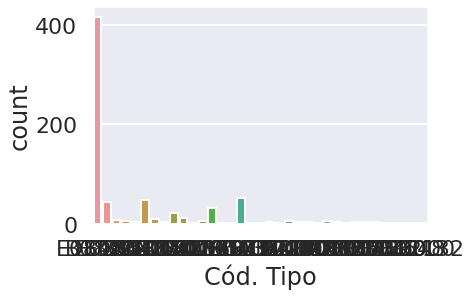

In [199]:
#Plotando Gráfico
sns.set_style('darkgrid')
sns.countplot(x='Cód. Tipo', data=aux)

### 5.2 Cidade de Itaporanga

In [91]:
# filtrando por tipo de Ocorrências 
#criando auxiliar para filtrar por cidade
aux=df1[df1.Município=='ITAPORANGA DAJUDA']
aux[['Descrição', 'Cód. Tipo',"Ocorrência"]].groupby(['Descrição', 'Cód. Tipo']).count().sort_values(by = 'Ocorrência', ascending = False).head(5).reset_index()



,Descrição,Cód. Tipo,Ocorrência
0,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS,E08420,417
1,DESOBEDIENCIA,G01330,51
2,AMEACA,B01147,47
3,VIAS DE FATO - AGRESSAO,B08210,43
4,ROUBO,C01157,31


<AxesSubplot:xlabel='Cód. Tipo', ylabel='count'>

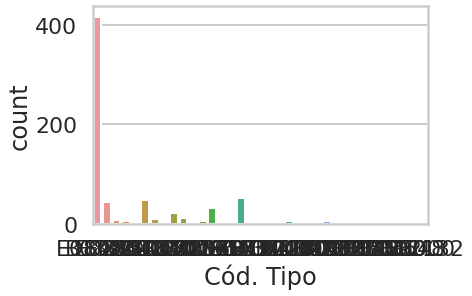

In [200]:
#Plotando Gráfico
sns.set_style('whitegrid')
sns.set_context('poster')
sns.countplot(x='Cód. Tipo', data=aux)

### 6. Filtrando as Ocorrências por Turno 

### 6.1 Total de Ocorrências pela Manhã

In [169]:
turno1=pd.read_csv('/home/isisaraujo/Repos/Projeto_piloto.PMSE/1Cipm/datasets/manha2020.csv')
turno1.head()

,Quantidade,Agência,Batalhão,Companhia,Descrição
0,823,PM,1CIPM,1CIPM,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS
1,227,PM,1CIPM,1CIPM,AMEACA
2,224,PM,1CIPM,1CIPM,VIAS DE FATO / AGRESSAO
3,109,PM,1CIPM,1CIPM,AVERIGUA PESSOA EM ATITUDE SUSPEITA
4,99,PM,1CIPM,1CIPM,DESOBEDIENCIA


In [170]:
#Achar dados nulos em um dataframe
turno1.isnull().sum().sort_values(ascending=False)[:10]

Descrição     0
Companhia     0
Batalhão      0
Agência       0
Quantidade    0
dtype: int64

In [171]:
turno1.value_counts(turno1['Batalhão'])

Batalhão
1CIPM    75
dtype: int64

In [173]:
soma=turno1['Quantidade'].sum()
print( '\n O total de Ocorrências atendidas no período da manhã no 1º Trimestre de 2020 foi de: {}'.format(soma))




 O total de Ocorrências atendidas no período da manhã no 1º Trimestre de 2020 foi de: 2104


In [ ]:
##Plotando o Gráfico

### 6.2 Total de Ocorrências pela Tarde

In [175]:
turno2=pd.read_csv('/home/isisaraujo/Repos/Projeto_piloto.PMSE/1Cipm/datasets/tarde2020.csv')
turno2.head()

,Quantidade,Agência,Batalhão,Companhia,Descrição
0,812,PM,1CIPM,1CIPM,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS
1,227,PM,1CIPM,1CIPM,AMEACA
2,218,PM,1CIPM,1CIPM,VIAS DE FATO / AGRESSAO
3,109,PM,1CIPM,1CIPM,AVERIGUA PESSOA EM ATITUDE SUSPEITA
4,101,PM,1CIPM,1CIPM,DESOBEDIENCIA


In [177]:
#Achar dados nulos em um dataframe
turno2.isnull().sum().sort_values(ascending=False)[:10]

Descrição     0
Companhia     0
Batalhão      0
Agência       0
Quantidade    0
dtype: int64

In [178]:
# Verificar se todos os valores são do 1CIPM
turno2.value_counts(turno1['Batalhão'])

Batalhão
1CIPM    75
dtype: int64

In [180]:
soma1=turno2['Quantidade'].sum()
print( '\n O total de Ocorrências atendidas no período da manhã no 1º Trimestre de 2020 foi de: {}'.format(soma1))



 O total de Ocorrências atendidas no período da manhã no 1º Trimestre de 2020 foi de: 2082


In [ ]:
##Gráfico

### 6.3 Total de Ocorrências pela Noite

In [182]:
turno3=pd.read_csv('/home/isisaraujo/Repos/Projeto_piloto.PMSE/1Cipm/datasets/noite2020.csv')
turno3.head()

,Quantidade,Agência,Batalhão,Companhia,Descrição
0,797,PM,1CIPM,1CIPM,PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS
1,225,PM,1CIPM,1CIPM,AMEACA
2,214,PM,1CIPM,1CIPM,VIAS DE FATO / AGRESSAO
3,109,PM,1CIPM,1CIPM,AVERIGUA PESSOA EM ATITUDE SUSPEITA
4,98,PM,1CIPM,1CIPM,ROUBO


In [184]:
#Achar dados nulos em um dataframe
turno3.isnull().sum().sort_values(ascending=False)[:10]

Descrição     0
Companhia     0
Batalhão      0
Agência       0
Quantidade    0
dtype: int64

In [185]:
# Verificar se todos os valores são do 1CIPM
turno3.value_counts(turno1['Batalhão'])

Batalhão
1CIPM    75
dtype: int64

In [186]:
soma2=turno3['Quantidade'].sum()
print( '\n O total de Ocorrências atendidas no período da manhã no 1º Trimestre de 2020 foi de: {}'.format(soma2))


 O total de Ocorrências atendidas no período da manhã no 1º Trimestre de 2020 foi de: 2055


In [ ]:
##Gráfico